In [1]:
import healpy as hp
import numpy as np

In [2]:
from astropy.io import fits

In [3]:
import numpy.ma as ma

In [4]:
%matplotlib inline

In [5]:
#from glob import glob
from matplotlib import pyplot as plt

In [6]:
hitmap_20deg = hp.ma(hp.read_map("../data/hitmaps/hitmap_Greenland_20_opening_20days.fits"))
hitmap_40deg = hp.ma(hp.read_map("../data/hitmaps/hitmap_Greenland_40_opening_20days.fits"))

NSIDE = 128
ORDERING = RING in fits file
NSIDE = 128
ORDERING = RING in fits file


In [7]:
sampling_frequency = 30

In [28]:
sensitivity_10GHz = 200.0 #units: microK sqrt(sec) 
sensitivity_15GHz = 170.0

In [9]:
# million hits
hitmap_20deg.sum()/1e6
hitmap_40deg.sum()/1e6

51.479568

In [10]:
# expected million hits
sampling_frequency*3600*24*20/1e6

51.84

In [11]:
sensitivity_map_20deg_10GHz = sensitivity_10GHz / np.sqrt(hitmap_20deg / sampling_frequency) 
sensitivity_map_20deg_15GHz = sensitivity_15GHz / np.sqrt(hitmap_20deg / sampling_frequency) 
sensitivity_map_40deg_10GHz = sensitivity_10GHz / np.sqrt(hitmap_40deg / sampling_frequency) 
sensitivity_map_40deg_15GHz = sensitivity_15GHz / np.sqrt(hitmap_40deg / sampling_frequency) 


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from IPython.kernel.zmq import kernelapp as app
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from IPython.kernel.zmq import kernelapp as app
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.

In [15]:
pixarea_sqdeg = hp.nside2pixarea(128, degrees=True)

In [16]:
#convert to degree units
sensitivity_map_20deg_10GHz_deg = sensitivity_map_20deg_10GHz * np.sqrt(pixarea_sqdeg)
sensitivity_map_20deg_15GHz_deg = sensitivity_map_20deg_15GHz * np.sqrt(pixarea_sqdeg) 
sensitivity_map_40deg_10GHz_deg = sensitivity_map_40deg_10GHz * np.sqrt(pixarea_sqdeg) 
sensitivity_map_40deg_15GHz_deg = sensitivity_map_40deg_15GHz * np.sqrt(pixarea_sqdeg) 

In [412]:
opening_angle = 20
frequency = 15
sensitivity_map = sensitivity_map_20deg_15GHz_deg

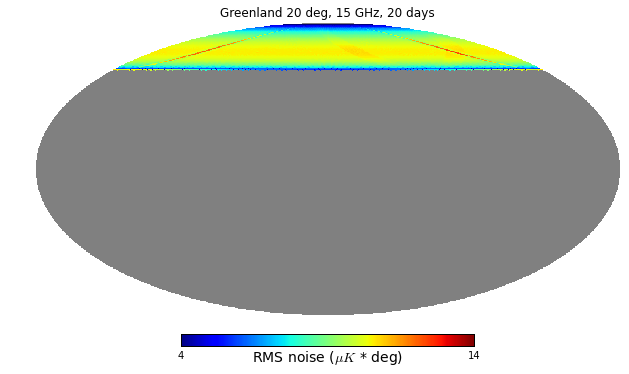

In [415]:
hp.mollview(sensitivity_map, xsize = 1000,  min=4, max=14, unit= 'RMS noise ' + '(' + r'$\mu K$ * deg' + ')' , title="Greenland %d deg, %d GHz, 20 days" % (opening_angle, frequency))
plt.savefig('../data/sensitivity/10&15GHz_20days/per_deg/Greenland_%ddeg_%dGHz_20days.png' % (opening_angle, frequency))

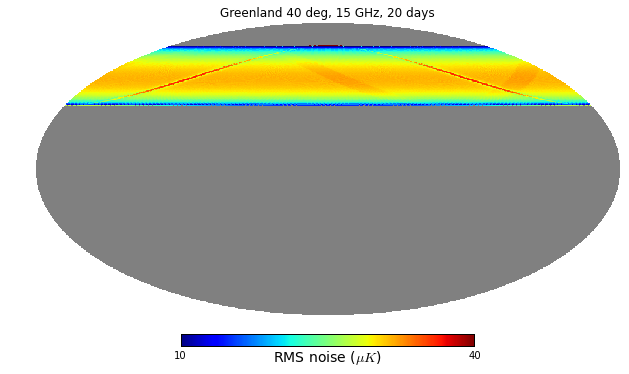

In [388]:
hp.mollview(sensitivity_map, xsize = 1000,  min=10, max=40, unit= 'RMS noise ' + '(' + r'$\mu K$' + ')' , title="Greenland %d deg, %d GHz, 20 days" % (opening_angle, frequency))
plt.savefig('../data/sensitivity/10&15GHz_20days/per_pixel/Greenland_%ddeg_%dGHz_20days.png' % (opening_angle, frequency))

In [357]:
hp.write_map('../data/sensitivity/10&15GHz_20days/per_pixel/sensitivity_20deg_10GHz_20days.fits' ,sensitivity_map_20deg_10GHz)
hp.write_map('../data/sensitivity/10&15GHz_20days/per_pixel/sensitivity_20deg_15GHz_20days.fits' ,sensitivity_map_20deg_15GHz)
hp.write_map('../data/sensitivity/10&15GHz_20days/per_pixel/sensitivity_40deg_10GHz_20days.fits' ,sensitivity_map_40deg_10GHz)
hp.write_map('../data/sensitivity/10&15GHz_20days/per_pixel/sensitivity_40deg_15GHz_20days.fits' ,sensitivity_map_40deg_15GHz)


In [358]:
#update the header file

NET_noise = [sensitivity_10GHz, sensitivity_15GHz]
i = 0

for frequency in [10., 15.]:
    for opening_angle in [20., 40.]:
        header_file = fits.open('../data/sensitivity/10&15GHz_20days/per_pixel/sensitivity_%ddeg_%dGHz_20days.fits' % (opening_angle, frequency), mode = 'update')
        xtension = header_file[1].header
        
        xtension.set('UNITS', 'microK' ,' Noise Map Units')
        xtension.set('S_FREQ', 30.0, 'Sampling Frequency (GHz)')
        xtension.set('O_FREQ', frequency, 'Observing Frequency (GHz)')
        xtension.set('ANGLE', opening_angle, 'Opening Angle of Telescope (degrees)')
        xtension.set('LONG', -38.4592, 'Longitude of Greenland Site (degrees)')
        xtension.set('LAT', 72.5796, 'Latitude of Greenland Site (degrees)')
        xtension.set('HOURS', 20.0*24, 'Integration time (Hours)')
        xtension.set('NET', NET_noise[i], 'Aggregate NET rms noise (microK*sqrt(seconds))')
        xtension.set('COORDSYS', 'Equatorial', 'Coordinate System')
        
        header_file.flush()
        
    i += 1

In [8]:
hdulist2 = fits.open('../data/sensitivity/10&15GHz_20days/per_pixel/sensitivity_20deg_10GHz_20days.fits')


In [9]:
hdulist2[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096 / length of dimension 1                          
NAXIS2  =                  192 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    1 / number of table fields                         
TTYPE1  = 'I       '                                                            
TFORM1  = '1024E   '                                                            
PIXTYPE = 'HEALPIX '           / HEALPIX pixelisation                           
ORDERING= 'RING    '           / Pixel ordering scheme, either RING or NESTED   
EXTNAME = 'xtension'        

In [33]:
print ma.count(hitmap_20deg) 
print ma.count(hitmap_40deg)

20538
38533


In [34]:
#number check:

#calculated average noise
sensitivity_mean_20deg = sensitivity_map_20deg_10GHz.mean()
sensitivity_mean_40deg = sensitivity_map_40deg_10GHz.mean()
#sensitivity_mean = sensitivity_map_20deg_10GHz.sum()/len(sensitivity_map_20deg_10GHz)

numPix = hp.nside2npix(128)
numGoodPix_20deg = ma.count(hitmap_20deg) # is this cheating?
numGoodPix_40deg = ma.count(hitmap_40deg)

#expected number of hits per pixel
hits_average_expected_20deg = sampling_frequency * 3600 * 24 * 20 / numGoodPix_20deg
hits_average_expected_40deg = sampling_frequency * 3600 * 24 * 20 / numGoodPix_40deg
#hits_average_expected = sampling_frequency * 3600 * 24 * 20 / numPix

#average hits per pixel
hits_mean_20deg = hitmap_20deg.mean()
hits_mean_40deg = hitmap_40deg.mean()
#hits_mean = hitmap_20deg.sum()/len(hitmap_20deg)

print "estimated hits (20deg): ", hits_average_expected_20deg
print "average hits(20deg): ", hits_mean_20deg
print "estimated hits / observed (20deg): ", hits_average_expected_20deg / hits_mean_20deg
print " "

print "estimated hits (40deg): ", hits_average_expected_40deg
print "average hits(40deg): ", hits_mean_40deg
print "estimated hits /observed (40deg): ", hits_average_expected_40deg / hits_mean_40deg
print " "

sensitivity_estimated_avg_20deg = sensitivity_10GHz / np.sqrt(hits_average_expected_20deg / sampling_frequency) 
sensitivity_estimated_avg_40deg = sensitivity_10GHz / np.sqrt(hits_average_expected_40deg / sampling_frequency) 

print " "
print "average sensitivity (20deg): ", sensitivity_mean_20deg
print "estimated average sensitivity (20deg): ", sensitivity_estimated_avg_20deg
print "estimated noise / observed (20deg): ", sensitivity_estimated_avg_20deg / sensitivity_mean_20deg
print " "

print "average sensitivity (40deg): ", sensitivity_mean_40deg
print "estimated average sensitivity (40deg): ", sensitivity_estimated_avg_40deg
print "estimated noise / observed (40deg): ", sensitivity_estimated_avg_40deg / sensitivity_mean_40deg
print " "

#total area for 20 deg opening:
area_20deg = pixarea_sqdeg * numGoodPix_20deg
area_40deg = pixarea_sqdeg * numGoodPix_40deg

# check that noise is proportional to area^-1/2
print "noise(20 deg) / noise(40deg): ", sensitivity_mean_20deg / sensitivity_mean_40deg
print "sqrt(area_40 / area_20): ", np.sqrt(area_40deg / area_20deg)

estimated hits (20deg):  2524
average hits(20deg):  2506.55536079
estimated hits / observed (20deg):  1.00695960659
 
estimated hits (40deg):  1345
average hits(40deg):  1335.98650507
estimated hits /observed (40deg):  1.00674669609
 
 
average sensitivity (20deg):  23.806259912
estimated average sensitivity (20deg):  21.8217890236
estimated noise / observed (20deg):  0.916640795499
 
average sensitivity (40deg):  32.7231277841
estimated average sensitivity (40deg):  30.1511344578
estimated noise / observed (40deg):  0.921401360429
 
noise(20 deg) / noise(40deg):  0.727505636658
sqrt(area_40 / area_20):  1.36973747052
